In [1]:
from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import KMeans
import torch
import numpy as np

# Load the pre-trained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained('pdelobelle/robbert-v2-dutch-base',max_length=512, truncation=True)
model = AutoModel.from_pretrained('pdelobelle/robbert-v2-dutch-base')

# Example list of texts
texts = ["Tesla heeft vandaag een koers winst gemaakt van 5%",
         "Amazon groeide vandaag met 2%",
         "Tim Cook ging vanadaag praten met Joe Biden",
         "Apple moest veel personeel ontslaan"]

# Tokenize and generate embeddings for each text
embeddings = []
for text in texts:
    tokens = tokenizer.encode(text, add_special_tokens=True)
    inputs = torch.tensor([tokens])
    outputs = model(inputs)[0]
    embedding = torch.mean(outputs, dim=1).squeeze().detach().numpy()
    embeddings.append(embedding)

# Perform clustering
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(embeddings)

# Print the clustering results
for text, cluster in zip(texts, clusters):
    print(f"Text: {text}\tCluster: {cluster}")


c:\Users\bartw\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\bartw\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\bartw\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see ac

Text: Tesla heeft vandaag een koers winst gemaakt van 5%	Cluster: 1
Text: Amazon groeide vandaag met 2%	Cluster: 1
Text: Tim cook ging vanadaag praten met Joe bidon	Cluster: 2
Text: Apple moest veel personeel ontslaan	Cluster: 0


Dit is een opdracht

No sentence-transformers model found with name C:\Users\bartw/.cache\torch\sentence_transformers\pdelobelle_robbert-v2-dutch-base. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\bartw/.cache\torch\sentence_transformers\pdelobelle_robbert-v2-dutch-base were not used when initializing RobertaModel: ['lm_head.bias', 'lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were 

[[-0.05971839  0.33046728 -0.01758916 ... -0.13344729  0.1035995
   0.08198602]
 [ 0.2098927   0.05427433  0.13109139 ... -0.5119104   0.12725832
  -0.03535213]
 [ 0.24329133  0.5047996  -0.12289456 ...  0.07178545 -0.19214566
   0.11181694]
 ...
 [-0.12545165 -0.28594106  0.21877949 ... -0.5588715  -0.26899728
  -0.35791844]
 [-0.58649313 -0.12710771 -0.12930635 ... -0.41726866  0.2432718
  -0.30779362]
 [-0.27949256 -0.45445302 -0.03499668 ... -0.3291373  -0.38556004
  -0.39341882]]


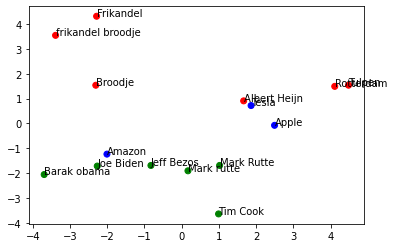

In [2]:
from sentence_transformers import SentenceTransformer
import numpy as np
np.random.seed(42)
sentences = ["Frikandel", "Broodje", "frikandel broodje", "Tesla", "Apple", "Amazon",
             "Tim Cook", "Joe Biden", "Barak obama", "Mark rutte", "Mark Rutte", "Jeff Bezos",
             "Albert Heijn", "Tulpen", "Rotterdam"]

model = SentenceTransformer('pdelobelle/robbert-v2-dutch-base')
embeddings = model.encode(sentences)
print(embeddings)

# plot embeddings
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(embeddings)
X = pca.transform(embeddings)
# make frikandel broodje and frikandel the same color
colors = ['red', 'red', 'red', 'blue', 'blue', 'blue', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'red']
plt.scatter(X[:, 0], X[:, 1], c=colors)
for i, txt in enumerate(sentences):
    plt.annotate(txt, (X[i, 0], X[i, 1]))
